In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
np.random.seed(42)

# square meters of apartments in Almaty
sizes = np.random.uniform(30, 150, 200)  # 30–150 m²
# true price model: price = 1200 * size + noise
true_slope = 1200
noise = np.random.normal(0, 20000, 200)
prices = true_slope * sizes + noise

data = np.asarray({
    "size_m2": sizes,
    "price": prices
})


In [100]:
import random
import numpy as np

def train_test_split(X, y, test_size=0.2, shuffle=True):
    # pair x and y so they stay aligned
    data = list(zip(X, y))

    # shuffle data if needed
    if shuffle:
        random.shuffle(data)

    # compute split sizes
    n_total = len(data)
    n_test = int(n_total * test_size)
    n_train = n_total - n_test

    # split into train and test
    train_data = data[:n_train]
    test_data = data[n_train:]

    # unzip pairs back into separate arrays
    X_train, y_train = zip(*train_data)
    X_test, y_test = zip(*test_data)

    # return numpy arrays
    return (
        np.asarray(X_train),
        np.asarray(y_train),
        np.asarray(X_test),
        np.asarray(y_test)
    )


In [101]:
data = np.column_stack((sizes, prices))

In [102]:
X_train, y_train, X_test, y_test = train_test_split(sizes, prices, test_size=0.2)


$$
y = b + w x 
$$
где $w$ — slope, $b$ — bias

**Mean Squared Error (MSE).**  
$w,b$, minimise
$$
J(w,b)=\frac{1}{n}\sum_{i=1}^n\big(y_i-(b+w x_i)\big)^2.
$$


**Close-Form Formula for one feature.**  
$$
\hat{w}=\frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}
=\frac{\operatorname{Cov}(x,y)}{\operatorname{Var}(x)},
\qquad
\hat{b}=\bar{y}-\hat{w}\,\bar{x},
$$
where $\bar{x}=\frac{1}{n}\sum x_i,\ \bar{y}=\frac{1}{n}\sum y_i$.





In [ ]:
class LinearRegression1D:
    def __init__(self):
        # model parameters
        self.w = None
        self.b = None
        self.is_fitted = False

    def fit(self, X_train, y_train):
        # convert input to numpy arrays
        x = np.asarray(X_train)
        y = np.asarray(y_train)

        # compute means
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        
        # compute numerator and denominator of the slope formula
        numerator = np.sum((x - x_mean) * (y - y_mean)) # how much x and y vary together (covariance)
        denominator = np.sum((x - x_mean) ** 2) # how much x varies on its own (variance)
 
        self.w = numerator / denominator
    
        self.b = y_mean - self.w * x_mean

        # mark model as fitted
        self.is_fitted = True
        return self
    
    def predict(self, X_test):
        x = np.asarray(X_test)
        # linear model y = wx + b
        return self.w * x + self.b


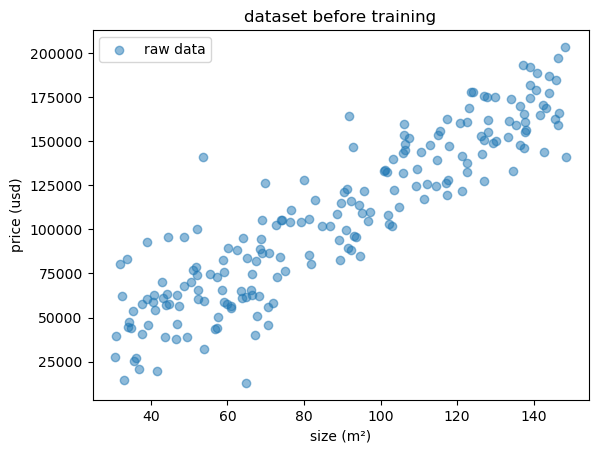

In [104]:
plt.scatter(sizes, prices, alpha=0.5, label="raw data")
plt.xlabel("size (m²)")
plt.ylabel("price (usd)")
plt.title("dataset before training")
plt.legend()
plt.show()

In [105]:
model = LinearRegression1D()

model.fit(X_train, y_train)

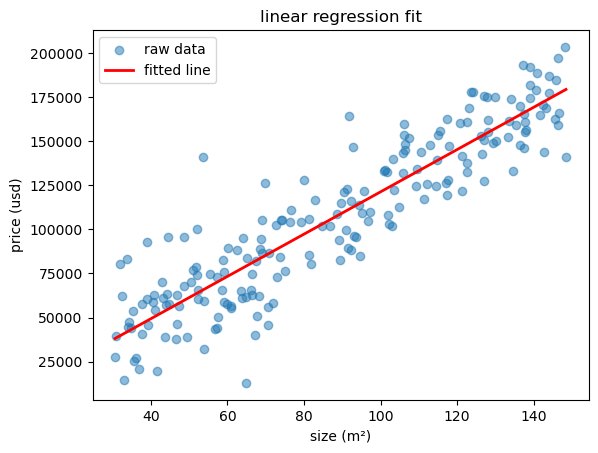

In [106]:
plt.scatter(sizes, prices, alpha=0.5, label="raw data")
plt.plot(
    np.sort(sizes), 
    model.predict(np.sort(sizes)),
    color="red",
    linewidth=2,
    label="fitted line"
)
plt.xlabel("size (m²)")
plt.ylabel("price (usd)")
plt.title("linear regression fit")
plt.legend()
plt.show()